In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

OriginCity       City_3
OriginLat         34.13
OriginLong        -71.8
DestCity        City_19
DestLat           42.58
DestLong         -73.86
Distance         956.52
TimeOfFlight       3.11
AirFarePrice       52.0
Name: 62, dtype: object


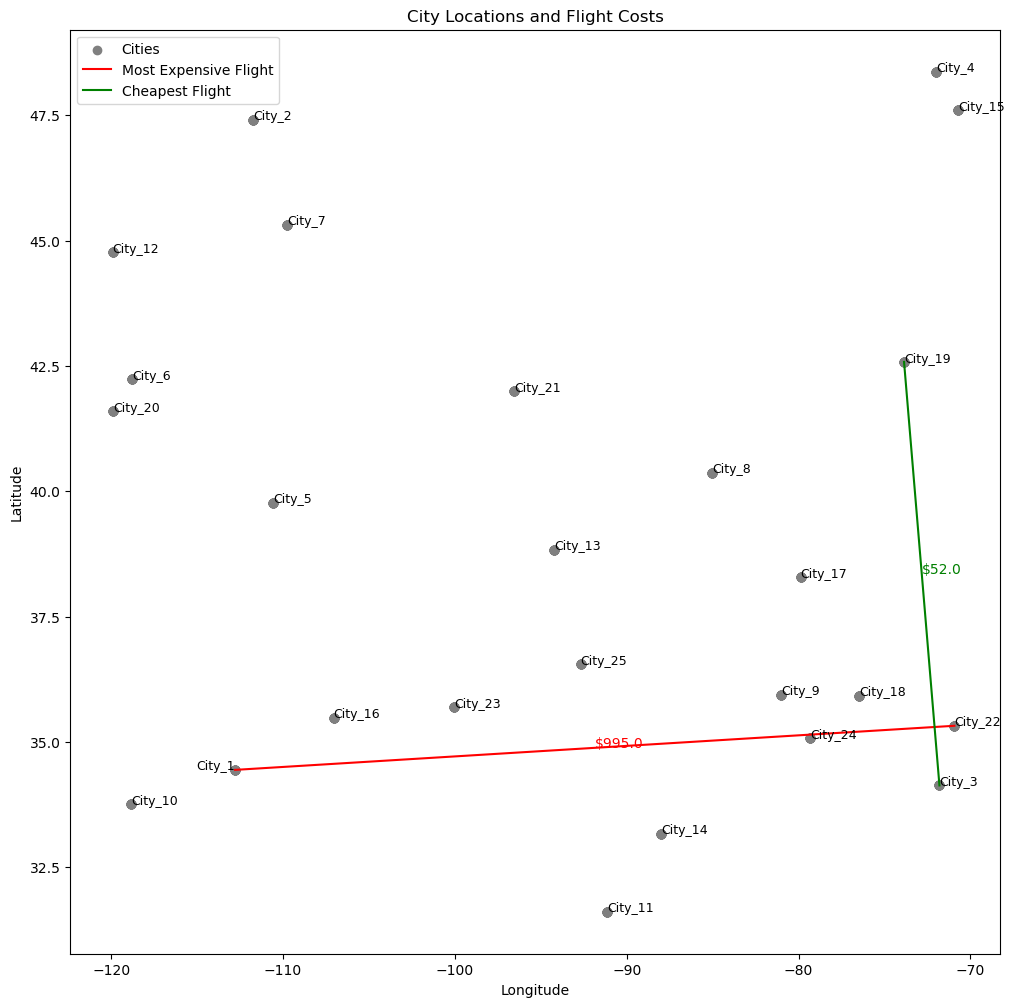

In [12]:
# ---
# Group No. 8
# 1. นนทรีย์ คำวันสา 6410450486
# 2. วินัสดา นิธิธรรมจรรยา 6410450591
# 3. อรรถวิชญ์ สิทธิ์เดชวิกรม 6410451920
# ---

group = 8 # อย่าลืมเปลี่ยนเลขกลุ่ม
problem = 5 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P5/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P5/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---
data['AirFarePrice'] = pd.to_numeric(data['AirFarePrice'], errors='coerce')

#วิเคราะห์ข้อมูล
# 1.ตั๋วเครื่องบินที่ถูกที่สุด
min_price_row = data.loc[data['AirFarePrice'].idxmin()]
print(min_price_row)
# 2.ตั๋วเครื่องบินที่แพงที่สุด
max_price_row = data.loc[data['AirFarePrice'].idxmax()]
#การแสดงผล
plt.figure(figsize=(12, 12))

#พล็อตเมือง
labeled_cities = set()

# 1.พล็อตเมืองและตั้งชื่อเมือง
for index, row in data.iterrows():
    if row['OriginCity'] not in labeled_cities:
        plt.text(row['OriginLong'], row['OriginLat'], row['OriginCity'], fontsize=9, ha='right')
        labeled_cities.add(row['OriginCity'])
    if row['DestCity'] not in labeled_cities:
        plt.text(row['DestLong'], row['DestLat'], row['DestCity'], fontsize=9, ha='left')
        labeled_cities.add(row['DestCity'])
plt.scatter(data['OriginLong'], data['OriginLat'], marker='o', label='Cities',color='gray')
plt.scatter(data['DestLong'], data['DestLat'], marker='o',color='gray')

# 2.วาดเส้นสีแดงสำหรับตั๋วเครื่องบินที่แพงที่สุด
plt.plot([max_price_row['OriginLong'], max_price_row['DestLong']],
         [max_price_row['OriginLat'], max_price_row['DestLat']], color='red', label='Most Expensive Flight')
plt.text((max_price_row['OriginLong'] + max_price_row['DestLong']) / 2,
         (max_price_row['OriginLat'] + max_price_row['DestLat']) / 2,
         f"${max_price_row['AirFarePrice']}", color='red', ha='left')

# 3.วาดเส้นสีเขียวสำหรับตั๋วเครื่องบินที่ถูกที่สุด
plt.plot([min_price_row['OriginLong'], min_price_row['DestLong']],
         [min_price_row['OriginLat'], min_price_row['DestLat']], color='green', label='Cheapest Flight')
plt.text((min_price_row['OriginLong'] + min_price_row['DestLong']) / 2,
         (min_price_row['OriginLat'] + min_price_row['DestLat']) / 2,
         f"${min_price_row['AirFarePrice']}", color='green', ha='left')

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.title("City Locations and Flight Costs")



data =pd.DataFrame([min_price_row, max_price_row])
data = data.sort_values(by='AirFarePrice', ascending=False)
# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()